**body level classification**
-   Gender: Male or female.
-   Age: Numeric value.
-   Height: Numeric value (in meters).
-   Weight: Numeric value (in kilograms).
-   Fam_Hist: Does the family have a history with obesity?
-   H_Cal_Consump: High caloric food consumption.
-   Veg_Consump: Frequency of vegetables consumption.
-   Meal_Count: Average number of meals per day.
-   Food_Between_Meals: Frequency of eating between meals.
-   Smoking: Is the person smoking?
-   Water_Consump: Frequency of water consumption.
-   H_Cal_Burn: Does the body have high calories burn rate?
-   Phys_Act: How often does the person do physical activities?
-   Time_E_Dev: How much time does person spend on electronic devices.
-   Alcohol_Consump: Frequency of alcohols consumption.
-   Transport: Which transports does the person usually use?
-   Body_Level: Class of human body level.


here we import libraries we will use them

In [466]:
%matplotlib inline
%config inlineBackend.figure_formats = ['svg']
# Import from Libraries
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

import scipy.stats as stat
import pylab


from sklearn.decomposition import PCA


from sklearn.metrics import classification_report


from sklearn.svm import SVC

from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')
# Dataset view settings
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', 90)

those some function help us to analysis data 


In [467]:
def plots_helper(column): # calculating the IQR to detrmine the exact number of outliers in each feature and skewness
    Q3 = np.quantile(column, 0.75)
    Q1 = np.quantile(column, 0.25)
    IQR = Q3 - Q1
    lower_range = Q1 - 1.5 * IQR
    upper_range = Q3 + 1.5 * IQR
    oc = len(column[column>upper_range]) + len(column[column<lower_range])
    percent = round((oc/len(column))*100,2)
    sk = round(stat.skew(column),2)
    return oc , percent , sk

In [468]:
def box_dist_prob_plots(df): # BoxPlot , Distribution, Histogram and ProbabilityPlot
    number_features = len(df.columns)
    
    plt.figure(figsize = (25,number_features*6))
    for column,i in zip(df,range(1,number_features*3+1,3)):
        
        # coalculating the outliers and its percentage
            
        oc , percent , sk = plots_helper(df[column])

        # plotting the 3 diagrams for each feature
        plt.subplot(number_features, 3, i)
        sns.boxplot(df[column])
        plt.xlabel(column, size=14)
        plt.title(f'Number of outliers {oc} ({percent}%)', fontsize=12, color ='red', fontweight = 'bold')
        
        plt.subplot(number_features, 3, i+1)
        sns.distplot(df[column],kde=False)
        plt.title(f'Skewness = {sk}', fontsize=12, color ='red', fontweight = 'bold')
        plt.xlabel(column, size=14)
        plt.ylabel("Count", size=14)
        plt.axvline(x=df[column].median(),ls='--')
        plt.axvline(x=df[column].mean())
        plt.legend(['mean', 'median'])
        
        plt.subplot(number_features, 3, i+2)
        stat.probplot(df[column],dist='norm',plot=pylab,rvalue=True)
        

In [469]:
def box_for_one_col(column,name):
    oc , percent , sk = plots_helper(column)

    # plotting the 3 diagrams for each feature
    plt.subplot(1, 3, 1)
    sns.boxplot(column)
    plt.xlabel(name, size=14)
    plt.title(f'Number of outliers {oc} ({percent}%)', fontsize=12, color ='red', fontweight = 'bold')
    
    plt.subplot(1, 3, 2)
    sns.distplot(column,kde=False)
    plt.title(f'Skewness = {sk}', fontsize=12, color ='red', fontweight = 'bold')
    plt.xlabel(name, size=14)
    plt.ylabel("Count", size=14)
    plt.axvline(x=column.median(),ls='--')
    plt.axvline(x=column.mean())
    plt.legend(['mean', 'median'])
    
    plt.subplot(1, 3, 3)
    stat.probplot(column,dist='norm',plot=pylab,rvalue=True)

read data

In [470]:
df = pd.read_csv('body_level_classification.csv')


see sample from it

In [471]:
df.sample(5)

,Gender,Age,Height,Weight,H_Cal_Consump,Veg_Consump,Water_Consump,Alcohol_Consump,Smoking,Meal_Count,Food_Between_Meals,Fam_Hist,H_Cal_Burn,Phys_Act,Time_E_Dev,Transport,Body_Level
620,Female,20.670975,1.509408,64.852953,no,2.294067,2.000000,no,no,3.209508,Sometimes,yes,no,1.103088,1.261043,Public_Transportation,Body Level 3
609,Female,17.085250,1.535618,57.259124,yes,1.972545,1.711074,Sometimes,no,2.339614,Sometimes,no,yes,0.095517,1.191053,Public_Transportation,Body Level 3
571,Female,19.821996,1.653431,75.090439,no,2.766036,2.707927,Sometimes,no,2.443812,Sometimes,yes,no,0.702839,0.827439,Public_Transportation,Body Level 3
1058,Female,21.700748,1.789555,137.767787,yes,3.000000,2.832659,Sometimes,no,3.000000,Sometimes,yes,no,1.505775,0.923005,Public_Transportation,Body Level 4
1080,Female,37.974483,1.560215,80.000000,yes,2.569075,1.567366,Sometimes,no,2.463113,Sometimes,yes,no,0.359134,0.000000,Automobile,Body Level 4


here we see non null data but may be weight or height =0 and this will be null also so we need check that 

In [472]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1477 entries, 0 to 1476
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Gender              1477 non-null   object 
 1   Age                 1477 non-null   float64
 2   Height              1477 non-null   float64
 3   Weight              1477 non-null   float64
 4   H_Cal_Consump       1477 non-null   object 
 5   Veg_Consump         1477 non-null   float64
 6   Water_Consump       1477 non-null   float64
 7   Alcohol_Consump     1477 non-null   object 
 8   Smoking             1477 non-null   object 
 9   Meal_Count          1477 non-null   float64
 10  Food_Between_Meals  1477 non-null   object 
 11  Fam_Hist            1477 non-null   object 
 12  H_Cal_Burn          1477 non-null   object 
 13  Phys_Act            1477 non-null   float64
 14  Time_E_Dev          1477 non-null   float64
 15  Transport           1477 non-null   object 
 16  Body_L

In [473]:
df.shape

(1477, 17)

from this function we see min for height 1.4 not 0 and weight also so we are fine.

Phys_Act	Time_E_Dev   those columns min are 0 and that is normal 

In [474]:
df.describe()

,Age,Height,Weight,Veg_Consump,Water_Consump,Meal_Count,Phys_Act,Time_E_Dev
count,1477.000000,1477.000000,1477.000000,1477.000000,1477.000000,1477.000000,1477.000000,1477.000000
mean,24.290420,1.701602,86.542290,2.421912,2.005120,2.682104,1.023106,0.650672
std,6.323081,0.094654,26.278277,0.540711,0.620307,0.790751,0.844840,0.605199
min,15.000000,1.456346,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.895877,1.629194,65.000000,2.000000,1.549931,2.644692,0.145687,0.000000
50%,22.720449,1.701284,82.636162,2.416044,2.000000,3.000000,1.000000,0.616045
75%,26.000000,1.770278,106.690530,3.000000,2.482933,3.000000,1.672639,1.000000
max,55.246250,1.980000,173.000000,3.000000,3.000000,4.000000,3.000000,2.000000


In [475]:
df.sample(5)

,Gender,Age,Height,Weight,H_Cal_Consump,Veg_Consump,Water_Consump,Alcohol_Consump,Smoking,Meal_Count,Food_Between_Meals,Fam_Hist,H_Cal_Burn,Phys_Act,Time_E_Dev,Transport,Body_Level
1342,Male,29.633715,1.834842,105.199360,yes,2.805533,1.882847,Sometimes,no,3.000000,Sometimes,yes,no,2.000000,0.707780,Automobile,Body Level 4
1363,Female,18.378203,1.746061,128.261402,yes,3.000000,2.501638,Sometimes,no,3.000000,Sometimes,yes,no,1.546179,0.664880,Public_Transportation,Body Level 4
90,Male,17.080493,1.782756,56.029418,yes,2.000000,2.285250,no,no,4.000000,Sometimes,yes,no,2.000000,1.162801,Automobile,Body Level 1
12,Female,18.019572,1.701378,50.088468,yes,1.601236,1.055019,Sometimes,no,3.433908,Sometimes,no,no,0.819269,1.030848,Public_Transportation,Body Level 1
225,Male,19.000000,1.670000,68.000000,yes,2.000000,2.000000,Sometimes,no,3.000000,Sometimes,no,no,1.000000,0.000000,Public_Transportation,Body Level 2


count duplicate rows

In [476]:
df.duplicated().sum()

14

show duplicate rows

In [477]:
df[df.duplicated()]

,Gender,Age,Height,Weight,H_Cal_Consump,Veg_Consump,Water_Consump,Alcohol_Consump,Smoking,Meal_Count,Food_Between_Meals,Fam_Hist,H_Cal_Burn,Phys_Act,Time_E_Dev,Transport,Body_Level
119,Female,21.0,1.52,42.0,yes,3.0,1.0,Sometimes,no,1.0,Frequently,no,no,0.0,0.0,Public_Transportation,Body Level 1
148,Female,21.0,1.52,42.0,no,3.0,1.0,Sometimes,no,1.0,Frequently,no,no,0.0,0.0,Public_Transportation,Body Level 1
176,Female,21.0,1.52,42.0,yes,3.0,1.0,Sometimes,no,1.0,Frequently,no,no,0.0,0.0,Public_Transportation,Body Level 1
184,Female,21.0,1.52,42.0,yes,3.0,1.0,Sometimes,no,1.0,Frequently,no,no,0.0,0.0,Public_Transportation,Body Level 1
301,Female,22.0,1.69,65.0,yes,2.0,2.0,Sometimes,no,3.0,Sometimes,yes,no,1.0,1.0,Public_Transportation,Body Level 2
302,Female,18.0,1.62,55.0,yes,2.0,1.0,no,no,3.0,Frequently,yes,no,1.0,1.0,Public_Transportation,Body Level 2
417,Male,21.0,1.62,70.0,yes,2.0,3.0,Sometimes,no,1.0,no,no,no,1.0,0.0,Public_Transportation,Body Level 3
429,Male,21.0,1.62,70.0,yes,2.0,3.0,Sometimes,no,1.0,no,no,no,1.0,0.0,Public_Transportation,Body Level 3
438,Male,21.0,1.62,70.0,yes,2.0,3.0,Sometimes,no,1.0,no,no,no,1.0,0.0,Public_Transportation,Body Level 3
461,Male,21.0,1.62,70.0,yes,2.0,3.0,Sometimes,no,1.0,no,no,no,1.0,0.0,Public_Transportation,Body Level 3


delete them

In [478]:
df=df.drop_duplicates()

check if deleted

In [479]:
df.duplicated().sum()

0

In [480]:
df[df.duplicated()]

,Gender,Age,Height,Weight,H_Cal_Consump,Veg_Consump,Water_Consump,Alcohol_Consump,Smoking,Meal_Count,Food_Between_Meals,Fam_Hist,H_Cal_Burn,Phys_Act,Time_E_Dev,Transport,Body_Level


here another way to check null 

In [481]:
df.isnull().sum()

Gender                0
Age                   0
Height                0
Weight                0
H_Cal_Consump         0
Veg_Consump           0
Water_Consump         0
Alcohol_Consump       0
Smoking               0
Meal_Count            0
Food_Between_Meals    0
Fam_Hist              0
H_Cal_Burn            0
Phys_Act              0
Time_E_Dev            0
Transport             0
Body_Level            0
dtype: int64

here we analysis columns category to body level 

we notice alchol always category is always 2 that is problem i think

In [482]:
for col in df.select_dtypes(include='object') :
    print(col)
    print(df.groupby(col)['Body_Level'].value_counts(normalize=True)*100)
    print('---------------------------')

Gender
Gender  Body_Level  
Female  Body Level 4    45.517241
        Body Level 3    24.000000
        Body Level 1    16.551724
        Body Level 2    13.931034
Male    Body Level 4    47.425474
        Body Level 3    30.352304
        Body Level 2    13.279133
        Body Level 1     8.943089
Name: Body_Level, dtype: float64
---------------------------
H_Cal_Consump
H_Cal_Consump  Body_Level  
no             Body Level 3    39.411765
               Body Level 2    35.882353
               Body Level 1    18.235294
               Body Level 4     6.470588
yes            Body Level 4    51.740139
               Body Level 3    25.599381
               Body Level 1    11.987626
               Body Level 2    10.672854
Name: Body_Level, dtype: float64
---------------------------
Alcohol_Consump
Alcohol_Consump  Body_Level  
Always           Body Level 2    100.000000
Frequently       Body Level 3     48.979592
                 Body Level 4     26.530612
                 Body Level 2 

oh same i said above there is problem, i have 1 only in data set always drink alchol

In [483]:
sum(np.where(df["Alcohol_Consump"]=="Always",1,0))

1

remove this row

In [484]:
df.drop(index=df[df["Alcohol_Consump"]=="Always"].index,inplace=True)

In [485]:
sum(np.where(df["Alcohol_Consump"]=="Always",1,0))

0

here we label encode body level

In [486]:
print(df['Body_Level'][:10])
numeric_var = {"Body_Level": {"Body Level 1":0, "Body Level 2":1, "Body Level 3":2, "Body Level 4":3}}
df = df.replace(numeric_var)
print(df['Body_Level'][:10])

0    Body Level 1
1    Body Level 1
2    Body Level 1
3    Body Level 1
4    Body Level 1
5    Body Level 1
6    Body Level 1
7    Body Level 1
8    Body Level 1
9    Body Level 1
Name: Body_Level, dtype: object
0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
8    0
9    0
Name: Body_Level, dtype: int64


Here we first see correlation between all columns and notice 
relation between body level and weight so high , i have now information i will use it before training 

In [487]:
df.corr()

,Age,Height,Weight,Veg_Consump,Water_Consump,Meal_Count,Phys_Act,Time_E_Dev,Body_Level
Age,1.000000,-0.029983,0.193775,0.025232,-0.036920,-0.072620,-0.124578,-0.296638,0.331072
Height,-0.029983,1.000000,0.462982,-0.033049,0.237215,0.231567,0.298507,0.030149,0.120578
Weight,0.193775,0.462982,1.000000,0.218417,0.217791,0.088760,-0.045400,-0.080036,0.836191
Veg_Consump,0.025232,-0.033049,0.218417,1.000000,0.089493,0.037557,0.022549,-0.102085,0.086662
Water_Consump,-0.036920,0.237215,0.217791,0.089493,1.000000,0.082349,0.178898,0.013402,0.136428
Meal_Count,-0.072620,0.231567,0.088760,0.037557,0.082349,1.000000,0.136972,0.008276,-0.086182
Phys_Act,-0.124578,0.298507,-0.045400,0.022549,0.178898,0.136972,1.000000,0.045041,-0.171904
Time_E_Dev,-0.296638,0.030149,-0.080036,-0.102085,0.013402,0.008276,0.045041,1.000000,-0.123753
Body_Level,0.331072,0.120578,0.836191,0.086662,0.136428,-0.086182,-0.171904,-0.123753,1.000000


now make all category columns numerical by get dummies function which convert col category to columns = # of categories of this col

In [488]:
df=pd.get_dummies(df)


see samples

In [489]:
df.sample(5)

,Age,Height,Weight,Veg_Consump,Water_Consump,Meal_Count,Phys_Act,Time_E_Dev,Body_Level,Gender_Female,Gender_Male,H_Cal_Consump_no,H_Cal_Consump_yes,Alcohol_Consump_Frequently,Alcohol_Consump_Sometimes,Alcohol_Consump_no,Smoking_no,Smoking_yes,Food_Between_Meals_Always,Food_Between_Meals_Frequently,Food_Between_Meals_Sometimes,Food_Between_Meals_no,Fam_Hist_no,Fam_Hist_yes,H_Cal_Burn_no,H_Cal_Burn_yes,Transport_Automobile,Transport_Bike,Transport_Motorbike,Transport_Public_Transportation,Transport_Walking
59,18.216032,1.755507,52.000000,3.000000,2.000000,3.000000,0.658894,1.000000,0,0,1,0,1,0,0,1,1,0,0,1,0,0,0,1,1,0,0,0,0,1,0
826,21.056059,1.730113,152.094362,3.000000,2.374958,3.000000,0.750111,0.671458,3,1,0,0,1,0,1,0,1,0,0,0,1,0,0,1,1,0,0,0,0,1,0
570,35.432059,1.663178,80.135167,2.000000,1.992548,3.000000,0.039207,1.528714,2,1,0,0,1,0,0,1,1,0,0,0,1,0,0,1,1,0,1,0,0,0,0
684,23.801436,1.855779,86.098523,2.000000,1.675733,2.372339,1.066241,1.000000,2,0,1,0,1,0,1,0,1,0,0,0,1,0,0,1,1,0,1,0,0,0,0
18,17.082867,1.640824,43.365005,2.815157,2.911187,3.000000,2.595128,1.380204,0,1,0,0,1,0,1,0,1,0,0,0,1,0,1,0,1,0,0,0,0,1,0


In [490]:
df.columns

Index(['Age', 'Height', 'Weight', 'Veg_Consump', 'Water_Consump', 'Meal_Count',
       'Phys_Act', 'Time_E_Dev', 'Body_Level', 'Gender_Female', 'Gender_Male',
       'H_Cal_Consump_no', 'H_Cal_Consump_yes', 'Alcohol_Consump_Frequently',
       'Alcohol_Consump_Sometimes', 'Alcohol_Consump_no', 'Smoking_no',
       'Smoking_yes', 'Food_Between_Meals_Always',
       'Food_Between_Meals_Frequently', 'Food_Between_Meals_Sometimes',
       'Food_Between_Meals_no', 'Fam_Hist_no', 'Fam_Hist_yes', 'H_Cal_Burn_no',
       'H_Cal_Burn_yes', 'Transport_Automobile', 'Transport_Bike',
       'Transport_Motorbike', 'Transport_Public_Transportation',
       'Transport_Walking'],
      dtype='object')

here we plot every columns to see outliers and feature distrbution

we notice we have some columns have outliers but before solve them we will try run them first in some models 

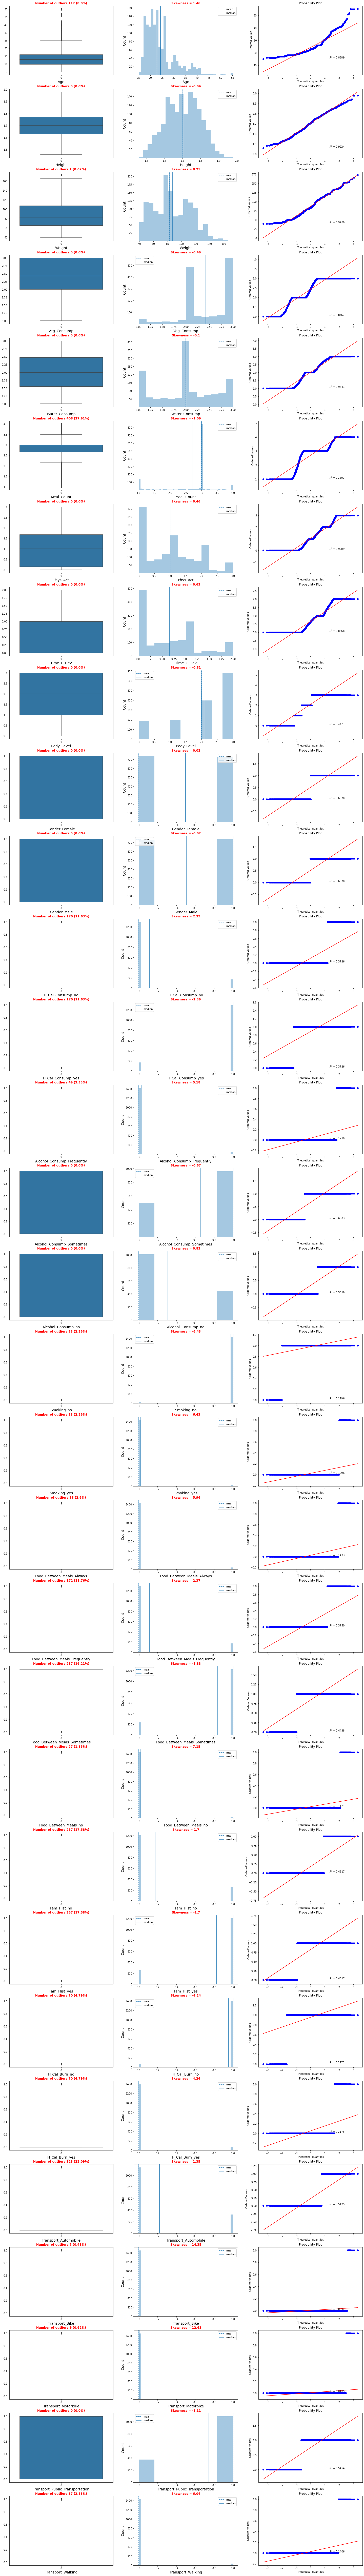

In [491]:
box_dist_prob_plots(df)

here we have imbalance data set we will try solve it but after training because may be not effect in model

(array([186.,   0.,   0., 198.,   0.,   0., 398.,   0.,   0., 680.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <BarContainer object of 10 artists>)

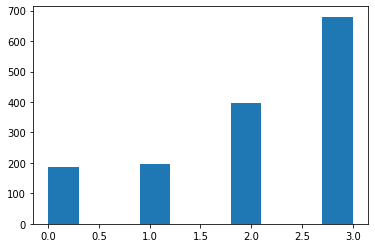

In [492]:
plt.hist(df["Body_Level"])

In [493]:
from collections import Counter
print(Counter(df["Body_Level"]))

Counter({3: 680, 2: 398, 1: 198, 0: 186})


X= features 
Y=label

In [494]:
X=df.iloc[:,:].copy()
Y=df["Body_Level"].copy()

X=X.drop(["Body_Level"],axis=1)




In [495]:
X.columns

Index(['Age', 'Height', 'Weight', 'Veg_Consump', 'Water_Consump', 'Meal_Count',
       'Phys_Act', 'Time_E_Dev', 'Gender_Female', 'Gender_Male',
       'H_Cal_Consump_no', 'H_Cal_Consump_yes', 'Alcohol_Consump_Frequently',
       'Alcohol_Consump_Sometimes', 'Alcohol_Consump_no', 'Smoking_no',
       'Smoking_yes', 'Food_Between_Meals_Always',
       'Food_Between_Meals_Frequently', 'Food_Between_Meals_Sometimes',
       'Food_Between_Meals_no', 'Fam_Hist_no', 'Fam_Hist_yes', 'H_Cal_Burn_no',
       'H_Cal_Burn_yes', 'Transport_Automobile', 'Transport_Bike',
       'Transport_Motorbike', 'Transport_Public_Transportation',
       'Transport_Walking'],
      dtype='object')

before start training i have body level and weight have high corr so i will check first feature importance if weight has high importance so we have 30 features we will remove them

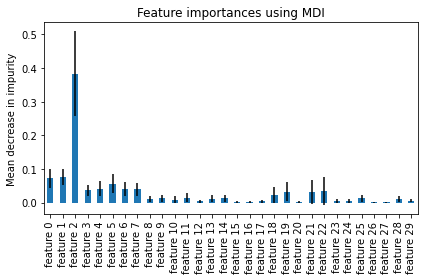

In [496]:
# feature importance 
import time
import pandas as pd
import numpy as np
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
from sklearn.ensemble import RandomForestClassifier

feature_names = [f"feature {i}" for i in range(X.shape[1])]
forest = RandomForestClassifier(random_state=0)
forest.fit(X_train, y_train)



importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)





forest_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

of course same i said weight has highest importance  we will check with another way to ensure 

pca told us one feature has variance 99.9% of course its weight so that is told us we should use regularization  or remove all features except weight

In [497]:
pca = PCA(n_components=.999)
x=pca.fit(X)
print(pca.explained_variance_ratio_)

x=pca.fit_transform(X)
print(x.shape)

[9.41296386e-01 5.29112044e-02 1.15967425e-03 7.99862556e-04
 6.80373392e-04 5.31559685e-04 4.75972789e-04 4.42813033e-04
 3.19528717e-04 2.95866700e-04 2.65191493e-04]
(1462, 11)


here we will try use regularization

In [498]:

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [499]:
X_train.shape

(1169, 30)

In [500]:
y_train.shape

(1169,)

In [501]:
svc=SVC()

svc.fit(X_train,y_train)

SVC()

In [502]:
y_predict=svc.predict(X_train)

accuracy = accuracy_score(y_train, y_predict)

print('Model accuracy is: ', accuracy)
print(classification_report(y_train,y_predict))

Model accuracy is:  0.7656116338751069
              precision    recall  f1-score   support

           0       0.69      0.92      0.79       155
           1       0.53      0.27      0.36       153
           2       0.63      0.82      0.72       314
           3       0.95      0.83      0.88       547

    accuracy                           0.77      1169
   macro avg       0.70      0.71      0.69      1169
weighted avg       0.78      0.77      0.76      1169



In [503]:
y_predict=svc.predict(X_test)
accuracy = accuracy_score(y_test, y_predict)

print('Model accuracy is: ', accuracy)
print(classification_report(y_test,y_predict))

Model accuracy is:  0.7508532423208191
              precision    recall  f1-score   support

           0       0.57      0.81      0.67        31
           1       0.55      0.36      0.43        45
           2       0.66      0.85      0.74        84
           3       0.96      0.81      0.88       133

    accuracy                           0.75       293
   macro avg       0.68      0.70      0.68       293
weighted avg       0.77      0.75      0.75       293



first use svm with gamma .1 for regularization

In [504]:

svc=SVC(gamma=.1)

svc.fit(X_train,y_train)

SVC(gamma=0.1)

very good accuracy for train and test 

In [505]:
y_predict=svc.predict(X_train)

accuracy = accuracy_score(y_train, y_predict)

print('Model accuracy is: ', accuracy)
print(classification_report(y_train,y_predict))

Model accuracy is:  0.9846022241231822
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       155
           1       0.99      0.92      0.95       153
           2       0.97      0.98      0.98       314
           3       0.99      1.00      1.00       547

    accuracy                           0.98      1169
   macro avg       0.98      0.98      0.98      1169
weighted avg       0.98      0.98      0.98      1169



In [506]:
y_predict=svc.predict(X_test)
accuracy = accuracy_score(y_test, y_predict)

print('Model accuracy is: ', accuracy)
print(classification_report(y_test,y_predict))

Model accuracy is:  0.8907849829351536
              precision    recall  f1-score   support

           0       0.83      0.97      0.90        31
           1       0.82      0.62      0.71        45
           2       0.84      0.88      0.86        84
           3       0.96      0.97      0.96       133

    accuracy                           0.89       293
   macro avg       0.86      0.86      0.86       293
weighted avg       0.89      0.89      0.89       293



now decision tree 

In [507]:
from sklearn.tree import DecisionTreeClassifier
dTree_clf = DecisionTreeClassifier()
dTree_clf.fit(X_train,y_train)

DecisionTreeClassifier()

we have also good result

In [508]:
y_pred2 = dTree_clf.predict(X_train)

accuracy = accuracy_score(y_train, y_pred2)

print('Model accuracy is: ', accuracy)
print(classification_report(y_train,y_pred2))

Model accuracy is:  1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       155
           1       1.00      1.00      1.00       153
           2       1.00      1.00      1.00       314
           3       1.00      1.00      1.00       547

    accuracy                           1.00      1169
   macro avg       1.00      1.00      1.00      1169
weighted avg       1.00      1.00      1.00      1169



In [509]:
y_pred2 = dTree_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred2)

print('Model accuracy is: ', accuracy)
print(classification_report(y_test,y_pred2))

Model accuracy is:  0.9351535836177475
              precision    recall  f1-score   support

           0       0.97      0.94      0.95        31
           1       0.87      0.89      0.88        45
           2       0.90      0.90      0.90        84
           3       0.97      0.97      0.97       133

    accuracy                           0.94       293
   macro avg       0.93      0.92      0.93       293
weighted avg       0.94      0.94      0.94       293



xgboost now

In [510]:
from xgboost import XGBClassifier

model = XGBClassifier()
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

the highest result 

In [511]:
y_pred = model.predict(X_train)
accuracy = accuracy_score(y_train, y_pred)

print('Model accuracy is: ', accuracy)
print(classification_report(y_train,y_pred))

Model accuracy is:  1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       155
           1       1.00      1.00      1.00       153
           2       1.00      1.00      1.00       314
           3       1.00      1.00      1.00       547

    accuracy                           1.00      1169
   macro avg       1.00      1.00      1.00      1169
weighted avg       1.00      1.00      1.00      1169



In [512]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print('Model accuracy is: ', accuracy)
print(classification_report(y_test,y_pred))

Model accuracy is:  0.9829351535836177
              precision    recall  f1-score   support

           0       0.97      1.00      0.98        31
           1       0.96      0.96      0.96        45
           2       0.98      0.98      0.98        84
           3       1.00      0.99      1.00       133

    accuracy                           0.98       293
   macro avg       0.98      0.98      0.98       293
weighted avg       0.98      0.98      0.98       293



In [513]:
import pickle
with open('model.pkl', 'wb') as f:
    pickle.dump(model, f)

LogisticRegression now

In [514]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression().fit(X_train, y_train)

In [515]:
y_pred =clf.predict(X_train)
accuracy = accuracy_score(y_train, y_pred)

print('Model accuracy is: ', accuracy)
print(classification_report(y_train,y_pred))

Model accuracy is:  0.8579982891360137
              precision    recall  f1-score   support

           0       0.84      0.92      0.88       155
           1       0.71      0.56      0.63       153
           2       0.79      0.82      0.80       314
           3       0.94      0.94      0.94       547

    accuracy                           0.86      1169
   macro avg       0.82      0.81      0.81      1169
weighted avg       0.85      0.86      0.85      1169



In [516]:
y_pred =clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print('Model accuracy is: ', accuracy)
print(classification_report(y_test,y_pred))

Model accuracy is:  0.8225255972696246
              precision    recall  f1-score   support

           0       0.72      0.94      0.82        31
           1       0.62      0.40      0.49        45
           2       0.76      0.79      0.77        84
           3       0.93      0.96      0.95       133

    accuracy                           0.82       293
   macro avg       0.76      0.77      0.76       293
weighted avg       0.81      0.82      0.81       293



In [517]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(max_iter=23,solver="newton-cg",C=.9,random_state=0).fit(X_train, y_train)

the loweest accuracy 

In [518]:
y_pred =clf.predict(X_train)
accuracy = accuracy_score(y_train, y_pred)

print('Model accuracy is: ', accuracy)
print(classification_report(y_train,y_pred))

Model accuracy is:  0.9093242087254063
              precision    recall  f1-score   support

           0       0.87      0.97      0.92       155
           1       0.87      0.67      0.76       153
           2       0.86      0.89      0.87       314
           3       0.96      0.97      0.96       547

    accuracy                           0.91      1169
   macro avg       0.89      0.87      0.88      1169
weighted avg       0.91      0.91      0.91      1169



In [519]:
y_pred =clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print('Model accuracy is: ', accuracy)
print(classification_report(y_test,y_pred))

Model accuracy is:  0.8703071672354948
              precision    recall  f1-score   support

           0       0.76      1.00      0.86        31
           1       0.78      0.56      0.65        45
           2       0.83      0.85      0.84        84
           3       0.96      0.96      0.96       133

    accuracy                           0.87       293
   macro avg       0.83      0.84      0.83       293
weighted avg       0.87      0.87      0.87       293



In [520]:
from sklearn.ensemble import AdaBoostClassifier
adaboost = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=50, random_state=42)

# Train the AdaBoost classifier
adaboost.fit(X_train, y_train)



AdaBoostClassifier(base_estimator=DecisionTreeClassifier(), random_state=42)

In [521]:
# Make predictions on the test set
y_pred = adaboost.predict(X_train)
print(classification_report(y_train,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       155
           1       1.00      1.00      1.00       153
           2       1.00      1.00      1.00       314
           3       1.00      1.00      1.00       547

    accuracy                           1.00      1169
   macro avg       1.00      1.00      1.00      1169
weighted avg       1.00      1.00      1.00      1169



In [522]:
# Make predictions on the test set
y_pred = adaboost.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      0.94      0.95        31
           1       0.87      0.89      0.88        45
           2       0.90      0.90      0.90        84
           3       0.97      0.97      0.97       133

    accuracy                           0.94       293
   macro avg       0.93      0.92      0.93       293
weighted avg       0.94      0.94      0.94       293



above we said we have imbalance data sat so we will try to solve it using smote and run same models to see changes

In [523]:
from imblearn.over_sampling import SMOTE
print(Counter(y_train))
oversample = SMOTE()
X_train, y_train = oversample.fit_resample(X_train, y_train)
print(Counter(y_train))

Counter({3: 547, 2: 314, 0: 155, 1: 153})
Counter({3: 547, 2: 547, 1: 547, 0: 547})


svm more little higher

In [524]:
svc=SVC()

svc.fit(X_train,y_train)

SVC()

In [525]:
y_predict=svc.predict(X_train)
accuracy = accuracy_score(y_train, y_predict)

print('Model accuracy is: ', accuracy)
print(classification_report(y_train,y_predict))

Model accuracy is:  0.7340036563071298
              precision    recall  f1-score   support

           0       0.74      0.87      0.80       547
           1       0.61      0.52      0.56       547
           2       0.66      0.73      0.69       547
           3       0.95      0.82      0.88       547

    accuracy                           0.73      2188
   macro avg       0.74      0.73      0.73      2188
weighted avg       0.74      0.73      0.73      2188



In [526]:
y_predict=svc.predict(X_test)
accuracy = accuracy_score(y_test, y_predict)

print('Model accuracy is: ', accuracy)
print(classification_report(y_test,y_predict))

Model accuracy is:  0.7440273037542662
              precision    recall  f1-score   support

           0       0.63      0.77      0.70        31
           1       0.49      0.58      0.53        45
           2       0.66      0.74      0.70        84
           3       0.98      0.80      0.88       133

    accuracy                           0.74       293
   macro avg       0.69      0.72      0.70       293
weighted avg       0.78      0.74      0.75       293



In [527]:

svc=SVC(gamma=.1)

svc.fit(X_train,y_train)

SVC(gamma=0.1)

In [528]:
y_predict=svc.predict(X_train)
accuracy = accuracy_score(y_train, y_predict)

print('Model accuracy is: ', accuracy)
print(classification_report(y_train,y_predict))

Model accuracy is:  0.9949725776965265
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       547
           1       1.00      0.99      0.99       547
           2       0.99      0.99      0.99       547
           3       0.99      1.00      1.00       547

    accuracy                           0.99      2188
   macro avg       0.99      0.99      0.99      2188
weighted avg       0.99      0.99      0.99      2188



In [529]:
y_predict=svc.predict(X_test)
accuracy = accuracy_score(y_test, y_predict)

print('Model accuracy is: ', accuracy)
print(classification_report(y_test,y_predict))

Model accuracy is:  0.8976109215017065
              precision    recall  f1-score   support

           0       0.84      1.00      0.91        31
           1       0.83      0.64      0.73        45
           2       0.85      0.88      0.87        84
           3       0.96      0.97      0.97       133

    accuracy                           0.90       293
   macro avg       0.87      0.87      0.87       293
weighted avg       0.90      0.90      0.89       293



also more little higher

In [530]:
dTree_clf = DecisionTreeClassifier()
dTree_clf.fit(X_train,y_train)

DecisionTreeClassifier()

In [531]:
y_pred2 = dTree_clf.predict(X_train)
accuracy = accuracy_score(y_train, y_pred2)

print('Model accuracy is: ', accuracy)
print(classification_report(y_train,y_pred2))

Model accuracy is:  1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       547
           1       1.00      1.00      1.00       547
           2       1.00      1.00      1.00       547
           3       1.00      1.00      1.00       547

    accuracy                           1.00      2188
   macro avg       1.00      1.00      1.00      2188
weighted avg       1.00      1.00      1.00      2188



In [532]:
y_pred2 = dTree_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred2)

print('Model accuracy is: ', accuracy)
print(classification_report(y_test,y_pred2))

Model accuracy is:  0.9180887372013652
              precision    recall  f1-score   support

           0       0.86      1.00      0.93        31
           1       0.83      0.76      0.79        45
           2       0.88      0.89      0.89        84
           3       0.98      0.97      0.98       133

    accuracy                           0.92       293
   macro avg       0.89      0.90      0.90       293
weighted avg       0.92      0.92      0.92       293



here increase in test 1% so not bad and still the highest

In [533]:
model = XGBClassifier()
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [534]:
y_pred = model.predict(X_train)
accuracy = accuracy_score(y_train, y_pred)

print('Model accuracy is: ', accuracy)
print(classification_report(y_train,y_pred))

Model accuracy is:  1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       547
           1       1.00      1.00      1.00       547
           2       1.00      1.00      1.00       547
           3       1.00      1.00      1.00       547

    accuracy                           1.00      2188
   macro avg       1.00      1.00      1.00      2188
weighted avg       1.00      1.00      1.00      2188



In [535]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print('Model accuracy is: ', accuracy)
print(classification_report(y_test,y_pred))

Model accuracy is:  0.9761092150170648
              precision    recall  f1-score   support

           0       0.97      1.00      0.98        31
           1       0.95      0.93      0.94        45
           2       0.96      0.96      0.96        84
           3       0.99      0.99      0.99       133

    accuracy                           0.98       293
   macro avg       0.97      0.97      0.97       293
weighted avg       0.98      0.98      0.98       293



more little higher

In [536]:
clf = LogisticRegression().fit(X_train, y_train)

In [537]:
y_pred =clf.predict(X_train)
accuracy = accuracy_score(y_train, y_pred)

print('Model accuracy is: ', accuracy)
print(classification_report(y_train,y_pred))

Model accuracy is:  0.829981718464351
              precision    recall  f1-score   support

           0       0.87      0.91      0.89       547
           1       0.79      0.73      0.76       547
           2       0.75      0.81      0.78       547
           3       0.92      0.86      0.89       547

    accuracy                           0.83      2188
   macro avg       0.83      0.83      0.83      2188
weighted avg       0.83      0.83      0.83      2188



In [538]:
y_pred =clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print('Model accuracy is: ', accuracy)
print(classification_report(y_test,y_pred))

Model accuracy is:  0.8020477815699659
              precision    recall  f1-score   support

           0       0.70      1.00      0.83        31
           1       0.59      0.44      0.51        45
           2       0.71      0.80      0.75        84
           3       0.97      0.88      0.92       133

    accuracy                           0.80       293
   macro avg       0.74      0.78      0.75       293
weighted avg       0.81      0.80      0.80       293



In [539]:
clf = LogisticRegression(solver="newton-cg",C=.9,random_state=0).fit(X_train, y_train)

In [540]:
y_pred =clf.predict(X_train)
accuracy = accuracy_score(y_train, y_pred)

print('Model accuracy is: ', accuracy)
print(classification_report(y_train,y_pred))

Model accuracy is:  0.9236745886654479
              precision    recall  f1-score   support

           0       0.93      0.98      0.95       547
           1       0.94      0.87      0.90       547
           2       0.88      0.91      0.90       547
           3       0.95      0.93      0.94       547

    accuracy                           0.92      2188
   macro avg       0.92      0.92      0.92      2188
weighted avg       0.92      0.92      0.92      2188



In [541]:
y_pred =clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print('Model accuracy is: ', accuracy)
print(classification_report(y_test,y_pred))

Model accuracy is:  0.8668941979522184
              precision    recall  f1-score   support

           0       0.78      1.00      0.87        31
           1       0.74      0.58      0.65        45
           2       0.80      0.86      0.83        84
           3       0.98      0.94      0.96       133

    accuracy                           0.87       293
   macro avg       0.82      0.84      0.83       293
weighted avg       0.87      0.87      0.86       293



In [542]:

adaboost = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=50, random_state=42)

# Train the AdaBoost classifier
adaboost.fit(X_train, y_train)




AdaBoostClassifier(base_estimator=DecisionTreeClassifier(), random_state=42)

In [543]:
# Make predictions on the test set
y_pred = adaboost.predict(X_train)
print(classification_report(y_train,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       547
           1       1.00      1.00      1.00       547
           2       1.00      1.00      1.00       547
           3       1.00      1.00      1.00       547

    accuracy                           1.00      2188
   macro avg       1.00      1.00      1.00      2188
weighted avg       1.00      1.00      1.00      2188



In [544]:
# Make predictions on the test set
y_pred = adaboost.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      1.00      0.93        31
           1       0.87      0.76      0.81        45
           2       0.89      0.92      0.90        84
           3       0.98      0.97      0.98       133

    accuracy                           0.92       293
   macro avg       0.90      0.91      0.90       293
weighted avg       0.93      0.92      0.92       293



**PCA 2 features**

In [545]:
X_train, X_test, y_train, y_test = train_test_split(x, Y, test_size=0.2, random_state=42)

In [546]:
svc=SVC()

svc.fit(X_train,y_train)

SVC()

In [547]:
y_predict=svc.predict(X_train)

accuracy = accuracy_score(y_train, y_predict)

print('Model accuracy is: ', accuracy)
print(classification_report(y_train,y_predict))

Model accuracy is:  0.7981180496150556
              precision    recall  f1-score   support

           0       0.74      0.94      0.83       155
           1       0.73      0.32      0.45       153
           2       0.66      0.90      0.76       314
           3       0.96      0.83      0.89       547

    accuracy                           0.80      1169
   macro avg       0.77      0.75      0.73      1169
weighted avg       0.82      0.80      0.79      1169



In [548]:
y_predict=svc.predict(X_test)
accuracy = accuracy_score(y_test, y_predict)

print('Model accuracy is: ', accuracy)
print(classification_report(y_test,y_predict))

Model accuracy is:  0.7815699658703071
              precision    recall  f1-score   support

           0       0.66      0.94      0.77        31
           1       0.70      0.31      0.43        45
           2       0.66      0.92      0.77        84
           3       0.97      0.82      0.89       133

    accuracy                           0.78       293
   macro avg       0.75      0.75      0.72       293
weighted avg       0.81      0.78      0.77       293



first use svm with gamma .1 for regularization

In [549]:

svc=SVC(gamma=.1)

svc.fit(X_train,y_train)

SVC(gamma=0.1)

very good accuracy for train and test 

In [550]:
y_predict=svc.predict(X_train)

accuracy = accuracy_score(y_train, y_predict)

print('Model accuracy is: ', accuracy)
print(classification_report(y_train,y_predict))

Model accuracy is:  0.9769033361847733
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       155
           1       0.99      0.88      0.93       153
           2       0.95      0.97      0.96       314
           3       0.99      1.00      0.99       547

    accuracy                           0.98      1169
   macro avg       0.98      0.96      0.97      1169
weighted avg       0.98      0.98      0.98      1169



In [551]:
y_predict=svc.predict(X_test)
accuracy = accuracy_score(y_test, y_predict)

print('Model accuracy is: ', accuracy)
print(classification_report(y_test,y_predict))

Model accuracy is:  0.8839590443686007
              precision    recall  f1-score   support

           0       0.84      1.00      0.91        31
           1       0.79      0.58      0.67        45
           2       0.83      0.86      0.84        84
           3       0.96      0.98      0.97       133

    accuracy                           0.88       293
   macro avg       0.85      0.85      0.85       293
weighted avg       0.88      0.88      0.88       293



now decision tree 

In [552]:
from sklearn.tree import DecisionTreeClassifier
dTree_clf = DecisionTreeClassifier()
dTree_clf.fit(X_train,y_train)

DecisionTreeClassifier()

we have also good result

In [553]:
y_pred2 = dTree_clf.predict(X_train)

accuracy = accuracy_score(y_train, y_pred2)

print('Model accuracy is: ', accuracy)
print(classification_report(y_train,y_pred2))

Model accuracy is:  1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       155
           1       1.00      1.00      1.00       153
           2       1.00      1.00      1.00       314
           3       1.00      1.00      1.00       547

    accuracy                           1.00      1169
   macro avg       1.00      1.00      1.00      1169
weighted avg       1.00      1.00      1.00      1169



In [554]:
y_pred2 = dTree_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred2)

print('Model accuracy is: ', accuracy)
print(classification_report(y_test,y_pred2))

Model accuracy is:  0.8703071672354948
              precision    recall  f1-score   support

           0       0.89      0.81      0.85        31
           1       0.67      0.69      0.68        45
           2       0.82      0.83      0.83        84
           3       0.96      0.97      0.97       133

    accuracy                           0.87       293
   macro avg       0.84      0.82      0.83       293
weighted avg       0.87      0.87      0.87       293



xgboost now

In [555]:
from xgboost import XGBClassifier

model = XGBClassifier()
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

the highest result 

In [556]:
y_pred = model.predict(X_train)
accuracy = accuracy_score(y_train, y_pred)

print('Model accuracy is: ', accuracy)
print(classification_report(y_train,y_pred))

Model accuracy is:  1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       155
           1       1.00      1.00      1.00       153
           2       1.00      1.00      1.00       314
           3       1.00      1.00      1.00       547

    accuracy                           1.00      1169
   macro avg       1.00      1.00      1.00      1169
weighted avg       1.00      1.00      1.00      1169



In [557]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print('Model accuracy is: ', accuracy)
print(classification_report(y_test,y_pred))

Model accuracy is:  0.89419795221843
              precision    recall  f1-score   support

           0       0.79      1.00      0.89        31
           1       0.82      0.60      0.69        45
           2       0.84      0.89      0.87        84
           3       0.98      0.97      0.97       133

    accuracy                           0.89       293
   macro avg       0.86      0.87      0.85       293
weighted avg       0.89      0.89      0.89       293



LogisticRegression now

In [558]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression().fit(X_train, y_train)

In [559]:
y_pred =clf.predict(X_train)
accuracy = accuracy_score(y_train, y_pred)

print('Model accuracy is: ', accuracy)
print(classification_report(y_train,y_pred))

Model accuracy is:  0.8708297690333618
              precision    recall  f1-score   support

           0       0.83      0.94      0.88       155
           1       0.77      0.60      0.67       153
           2       0.81      0.84      0.82       314
           3       0.94      0.95      0.94       547

    accuracy                           0.87      1169
   macro avg       0.84      0.83      0.83      1169
weighted avg       0.87      0.87      0.87      1169



In [560]:
y_pred =clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print('Model accuracy is: ', accuracy)
print(classification_report(y_test,y_pred))

Model accuracy is:  0.7986348122866894
              precision    recall  f1-score   support

           0       0.67      0.97      0.79        31
           1       0.67      0.40      0.50        45
           2       0.73      0.76      0.74        84
           3       0.92      0.92      0.92       133

    accuracy                           0.80       293
   macro avg       0.74      0.76      0.74       293
weighted avg       0.80      0.80      0.79       293



In [561]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(max_iter=23,solver="newton-cg",C=.9,random_state=0).fit(X_train, y_train)

the loweest accuracy 

In [562]:
y_pred =clf.predict(X_train)
accuracy = accuracy_score(y_train, y_pred)

print('Model accuracy is: ', accuracy)
print(classification_report(y_train,y_pred))

Model accuracy is:  0.8682634730538922
              precision    recall  f1-score   support

           0       0.83      0.91      0.87       155
           1       0.76      0.61      0.67       153
           2       0.81      0.84      0.83       314
           3       0.94      0.95      0.94       547

    accuracy                           0.87      1169
   macro avg       0.83      0.83      0.83      1169
weighted avg       0.87      0.87      0.87      1169



In [563]:
y_pred =clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print('Model accuracy is: ', accuracy)
print(classification_report(y_test,y_pred))

Model accuracy is:  0.8293515358361775
              precision    recall  f1-score   support

           0       0.76      0.94      0.84        31
           1       0.71      0.53      0.61        45
           2       0.76      0.77      0.77        84
           3       0.92      0.94      0.93       133

    accuracy                           0.83       293
   macro avg       0.79      0.80      0.79       293
weighted avg       0.83      0.83      0.82       293



In [564]:

adaboost = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=50, random_state=42)

# Train the AdaBoost classifier
adaboost.fit(X_train, y_train)



AdaBoostClassifier(base_estimator=DecisionTreeClassifier(), random_state=42)

In [565]:
# Make predictions on the test set
y_pred = adaboost.predict(X_train)
print(classification_report(y_train,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       155
           1       1.00      1.00      1.00       153
           2       1.00      1.00      1.00       314
           3       1.00      1.00      1.00       547

    accuracy                           1.00      1169
   macro avg       1.00      1.00      1.00      1169
weighted avg       1.00      1.00      1.00      1169



In [566]:
# Make predictions on the test set
y_pred = adaboost.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.87      0.87        31
           1       0.71      0.64      0.67        45
           2       0.82      0.85      0.83        84
           3       0.96      0.97      0.97       133

    accuracy                           0.87       293
   macro avg       0.84      0.83      0.84       293
weighted avg       0.87      0.87      0.87       293



above we said we have imbalance data sat so we will try to solve it using smote and run same models to see changes

In [567]:
from imblearn.over_sampling import SMOTE
print(Counter(y_train))
oversample = SMOTE()
X_train, y_train = oversample.fit_resample(X_train, y_train)
print(Counter(y_train))

Counter({3: 547, 2: 314, 0: 155, 1: 153})
Counter({3: 547, 2: 547, 1: 547, 0: 547})


In [568]:
svc=SVC()

svc.fit(X_train,y_train)

SVC()

In [569]:
y_predict=svc.predict(X_train)
accuracy = accuracy_score(y_train, y_predict)

print('Model accuracy is: ', accuracy)
print(classification_report(y_train,y_predict))

Model accuracy is:  0.7851919561243145
              precision    recall  f1-score   support

           0       0.78      0.97      0.86       547
           1       0.74      0.57      0.65       547
           2       0.70      0.78      0.74       547
           3       0.95      0.81      0.88       547

    accuracy                           0.79      2188
   macro avg       0.79      0.79      0.78      2188
weighted avg       0.79      0.79      0.78      2188



In [570]:
y_predict=svc.predict(X_test)
accuracy = accuracy_score(y_test, y_predict)

print('Model accuracy is: ', accuracy)
print(classification_report(y_test,y_predict))

Model accuracy is:  0.7679180887372014
              precision    recall  f1-score   support

           0       0.67      0.97      0.79        31
           1       0.57      0.60      0.59        45
           2       0.67      0.75      0.71        84
           3       0.98      0.79      0.88       133

    accuracy                           0.77       293
   macro avg       0.72      0.78      0.74       293
weighted avg       0.80      0.77      0.77       293



svm more little higher

In [571]:

svc=SVC(gamma=.1)

svc.fit(X_train,y_train)

SVC(gamma=0.1)

In [572]:
y_predict=svc.predict(X_train)
accuracy = accuracy_score(y_train, y_predict)

print('Model accuracy is: ', accuracy)
print(classification_report(y_train,y_predict))

Model accuracy is:  0.9913162705667276
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       547
           1       0.99      0.98      0.99       547
           2       0.99      0.99      0.99       547
           3       1.00      1.00      1.00       547

    accuracy                           0.99      2188
   macro avg       0.99      0.99      0.99      2188
weighted avg       0.99      0.99      0.99      2188



In [573]:
y_predict=svc.predict(X_test)
accuracy = accuracy_score(y_test, y_predict)

print('Model accuracy is: ', accuracy)
print(classification_report(y_test,y_predict))

Model accuracy is:  0.8771331058020477
              precision    recall  f1-score   support

           0       0.84      1.00      0.91        31
           1       0.74      0.56      0.63        45
           2       0.81      0.86      0.83        84
           3       0.97      0.97      0.97       133

    accuracy                           0.88       293
   macro avg       0.84      0.85      0.84       293
weighted avg       0.87      0.88      0.87       293



also more little higher

In [574]:
dTree_clf = DecisionTreeClassifier()
dTree_clf.fit(X_train,y_train)

DecisionTreeClassifier()

In [575]:
y_pred2 = dTree_clf.predict(X_train)
accuracy = accuracy_score(y_train, y_pred2)

print('Model accuracy is: ', accuracy)
print(classification_report(y_train,y_pred2))

Model accuracy is:  1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       547
           1       1.00      1.00      1.00       547
           2       1.00      1.00      1.00       547
           3       1.00      1.00      1.00       547

    accuracy                           1.00      2188
   macro avg       1.00      1.00      1.00      2188
weighted avg       1.00      1.00      1.00      2188



In [576]:
y_pred2 = dTree_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred2)

print('Model accuracy is: ', accuracy)
print(classification_report(y_test,y_pred2))

Model accuracy is:  0.8225255972696246
              precision    recall  f1-score   support

           0       0.72      0.90      0.80        31
           1       0.62      0.51      0.56        45
           2       0.77      0.76      0.77        84
           3       0.94      0.95      0.94       133

    accuracy                           0.82       293
   macro avg       0.76      0.78      0.77       293
weighted avg       0.82      0.82      0.82       293



here increase in test 1% so not bad and still the highest

In [577]:
model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob',
              predictor=None, ...)

In [578]:
y_pred = model.predict(X_train)
accuracy = accuracy_score(y_train, y_pred)

print('Model accuracy is: ', accuracy)
print(classification_report(y_train,y_pred))

Model accuracy is:  1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       547
           1       1.00      1.00      1.00       547
           2       1.00      1.00      1.00       547
           3       1.00      1.00      1.00       547

    accuracy                           1.00      2188
   macro avg       1.00      1.00      1.00      2188
weighted avg       1.00      1.00      1.00      2188



In [579]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print('Model accuracy is: ', accuracy)
print(classification_report(y_test,y_pred))

Model accuracy is:  0.8907849829351536
              precision    recall  f1-score   support

           0       0.81      0.94      0.87        31
           1       0.79      0.67      0.72        45
           2       0.85      0.88      0.87        84
           3       0.97      0.96      0.97       133

    accuracy                           0.89       293
   macro avg       0.85      0.86      0.86       293
weighted avg       0.89      0.89      0.89       293



more little higher

In [580]:
clf = LogisticRegression().fit(X_train, y_train)

In [581]:
y_pred =clf.predict(X_train)
accuracy = accuracy_score(y_train, y_pred)

print('Model accuracy is: ', accuracy)
print(classification_report(y_train,y_pred))

Model accuracy is:  0.8473491773308958
              precision    recall  f1-score   support

           0       0.84      0.93      0.88       547
           1       0.83      0.70      0.76       547
           2       0.79      0.87      0.83       547
           3       0.94      0.89      0.91       547

    accuracy                           0.85      2188
   macro avg       0.85      0.85      0.85      2188
weighted avg       0.85      0.85      0.85      2188



In [582]:
y_pred =clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print('Model accuracy is: ', accuracy)
print(classification_report(y_test,y_pred))

Model accuracy is:  0.8395904436860068
              precision    recall  f1-score   support

           0       0.72      0.90      0.80        31
           1       0.71      0.60      0.65        45
           2       0.78      0.83      0.80        84
           3       0.96      0.91      0.93       133

    accuracy                           0.84       293
   macro avg       0.79      0.81      0.80       293
weighted avg       0.84      0.84      0.84       293



In [583]:
clf = LogisticRegression(solver="newton-cg",C=.9,random_state=0).fit(X_train, y_train)

In [584]:
y_pred =clf.predict(X_train)
accuracy = accuracy_score(y_train, y_pred)

print('Model accuracy is: ', accuracy)
print(classification_report(y_train,y_pred))

Model accuracy is:  0.8372943327239488
              precision    recall  f1-score   support

           0       0.84      0.90      0.87       547
           1       0.79      0.71      0.75       547
           2       0.79      0.84      0.82       547
           3       0.93      0.90      0.91       547

    accuracy                           0.84      2188
   macro avg       0.84      0.84      0.84      2188
weighted avg       0.84      0.84      0.84      2188



In [585]:
y_pred =clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print('Model accuracy is: ', accuracy)
print(classification_report(y_test,y_pred))

Model accuracy is:  0.8327645051194539
              precision    recall  f1-score   support

           0       0.78      0.94      0.85        31
           1       0.68      0.62      0.65        45
           2       0.76      0.79      0.77        84
           3       0.95      0.91      0.93       133

    accuracy                           0.83       293
   macro avg       0.79      0.81      0.80       293
weighted avg       0.83      0.83      0.83       293



In [586]:

adaboost = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=50, random_state=42)

# Train the AdaBoost classifier
adaboost.fit(X_train, y_train)



AdaBoostClassifier(base_estimator=DecisionTreeClassifier(), random_state=42)

In [587]:
# Make predictions on the test set
y_pred = adaboost.predict(X_train)
print(classification_report(y_train,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       547
           1       1.00      1.00      1.00       547
           2       1.00      1.00      1.00       547
           3       1.00      1.00      1.00       547

    accuracy                           1.00      2188
   macro avg       1.00      1.00      1.00      2188
weighted avg       1.00      1.00      1.00      2188



In [588]:
# Make predictions on the test set
y_pred = adaboost.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.68      0.90      0.78        31
           1       0.64      0.51      0.57        45
           2       0.78      0.77      0.78        84
           3       0.95      0.95      0.95       133

    accuracy                           0.83       293
   macro avg       0.76      0.78      0.77       293
weighted avg       0.82      0.83      0.82       293

